In [111]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error



In [112]:
data = pd.read_csv('Sydney2_Data.csv')

In [113]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Total Power
0,127.9439,264.9656,68.3481,521.7570,443.6997,195.9648,166.7701,504.2850,104.0226,205.2257,...,92861.7375,84584.2549,89041.0312,87204.4296,97380.7385,94753.7880,81677.9764,103129.6938,97196.8128,1463622.174
1,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,...,83029.8436,91483.7433,93748.1139,99467.6415,95935.6597,84254.7876,93786.3095,94499.4790,88941.7152,1489888.502
2,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,...,91309.1752,107598.5159,101897.2685,100876.0477,79350.0981,100060.2964,92733.9494,100646.9126,83394.8729,1495035.934
3,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,...,92083.6042,103182.5412,80688.8463,92306.4190,106440.6778,102118.7041,99295.1266,96503.3818,77942.2947,1459841.498
4,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,...,85602.1738,98370.5585,97148.3728,95775.0777,80723.5930,95865.7812,88525.7698,94546.5417,85021.1027,1475765.923


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           999 non-null    float64
 1   X2           999 non-null    float64
 2   X3           999 non-null    float64
 3   X4           999 non-null    float64
 4   X5           999 non-null    float64
 5   X6           999 non-null    float64
 6   X7           999 non-null    float64
 7   X8           999 non-null    float64
 8   X9           999 non-null    float64
 9   X10          999 non-null    float64
 10  X11          999 non-null    float64
 11  X12          999 non-null    float64
 12  X13          999 non-null    float64
 13  X14          999 non-null    float64
 14  X15          999 non-null    float64
 15  X16          999 non-null    float64
 16  Y1           999 non-null    float64
 17  Y2           999 non-null    float64
 18  Y3           999 non-null    float64
 19  Y4      

In [115]:
data.isnull().sum()

X1             0
X2             0
X3             0
X4             0
X5             0
X6             0
X7             0
X8             0
X9             0
X10            0
X11            0
X12            0
X13            0
X14            0
X15            0
X16            0
Y1             0
Y2             0
Y3             0
Y4             0
Y5             0
Y6             0
Y7             0
Y8             0
Y9             0
Y10            0
Y11            0
Y12            0
Y13            0
Y14            0
Y15            0
Y16            0
P1             0
P2             0
P3             0
P4             0
P5             0
P6             0
P7             0
P8             0
P9             0
P10            0
P11            0
P12            0
P13            0
P14            0
P15            0
P16            0
Total Power    0
dtype: int64

In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,999.0,4.540409e+02,133.436807,0.000000e+00,4.102586e+02,5.041191e+02,5.449869e+02,5.660000e+02
X2,999.0,2.974875e+02,130.125115,0.000000e+00,2.368683e+02,3.210916e+02,3.867394e+02,5.660000e+02
X3,999.0,1.344914e+02,173.564657,0.000000e+00,3.743000e+00,4.736470e+01,2.138169e+02,5.660000e+02
X4,999.0,1.133585e+02,142.130727,0.000000e+00,1.977515e+01,5.984330e+01,1.426921e+02,5.660000e+02
X5,999.0,4.540077e+02,136.924886,0.000000e+00,4.115375e+02,5.062503e+02,5.512162e+02,5.660000e+02
X6,999.0,4.542063e+02,155.370463,0.000000e+00,4.030413e+02,5.281353e+02,5.622427e+02,5.660000e+02
X7,999.0,1.272825e+02,156.502980,0.000000e+00,2.082325e+01,6.074340e+01,1.688830e+02,5.660000e+02
X8,999.0,1.711542e+02,133.906017,0.000000e+00,8.270790e+01,1.584427e+02,2.064226e+02,5.660000e+02
X9,999.0,1.529966e+02,130.745339,0.000000e+00,8.570620e+01,1.288887e+02,1.714674e+02,5.660000e+02
X10,999.0,3.001138e+02,127.024528,0.000000e+00,2.599712e+02,3.143891e+02,3.604758e+02,5.660000e+02


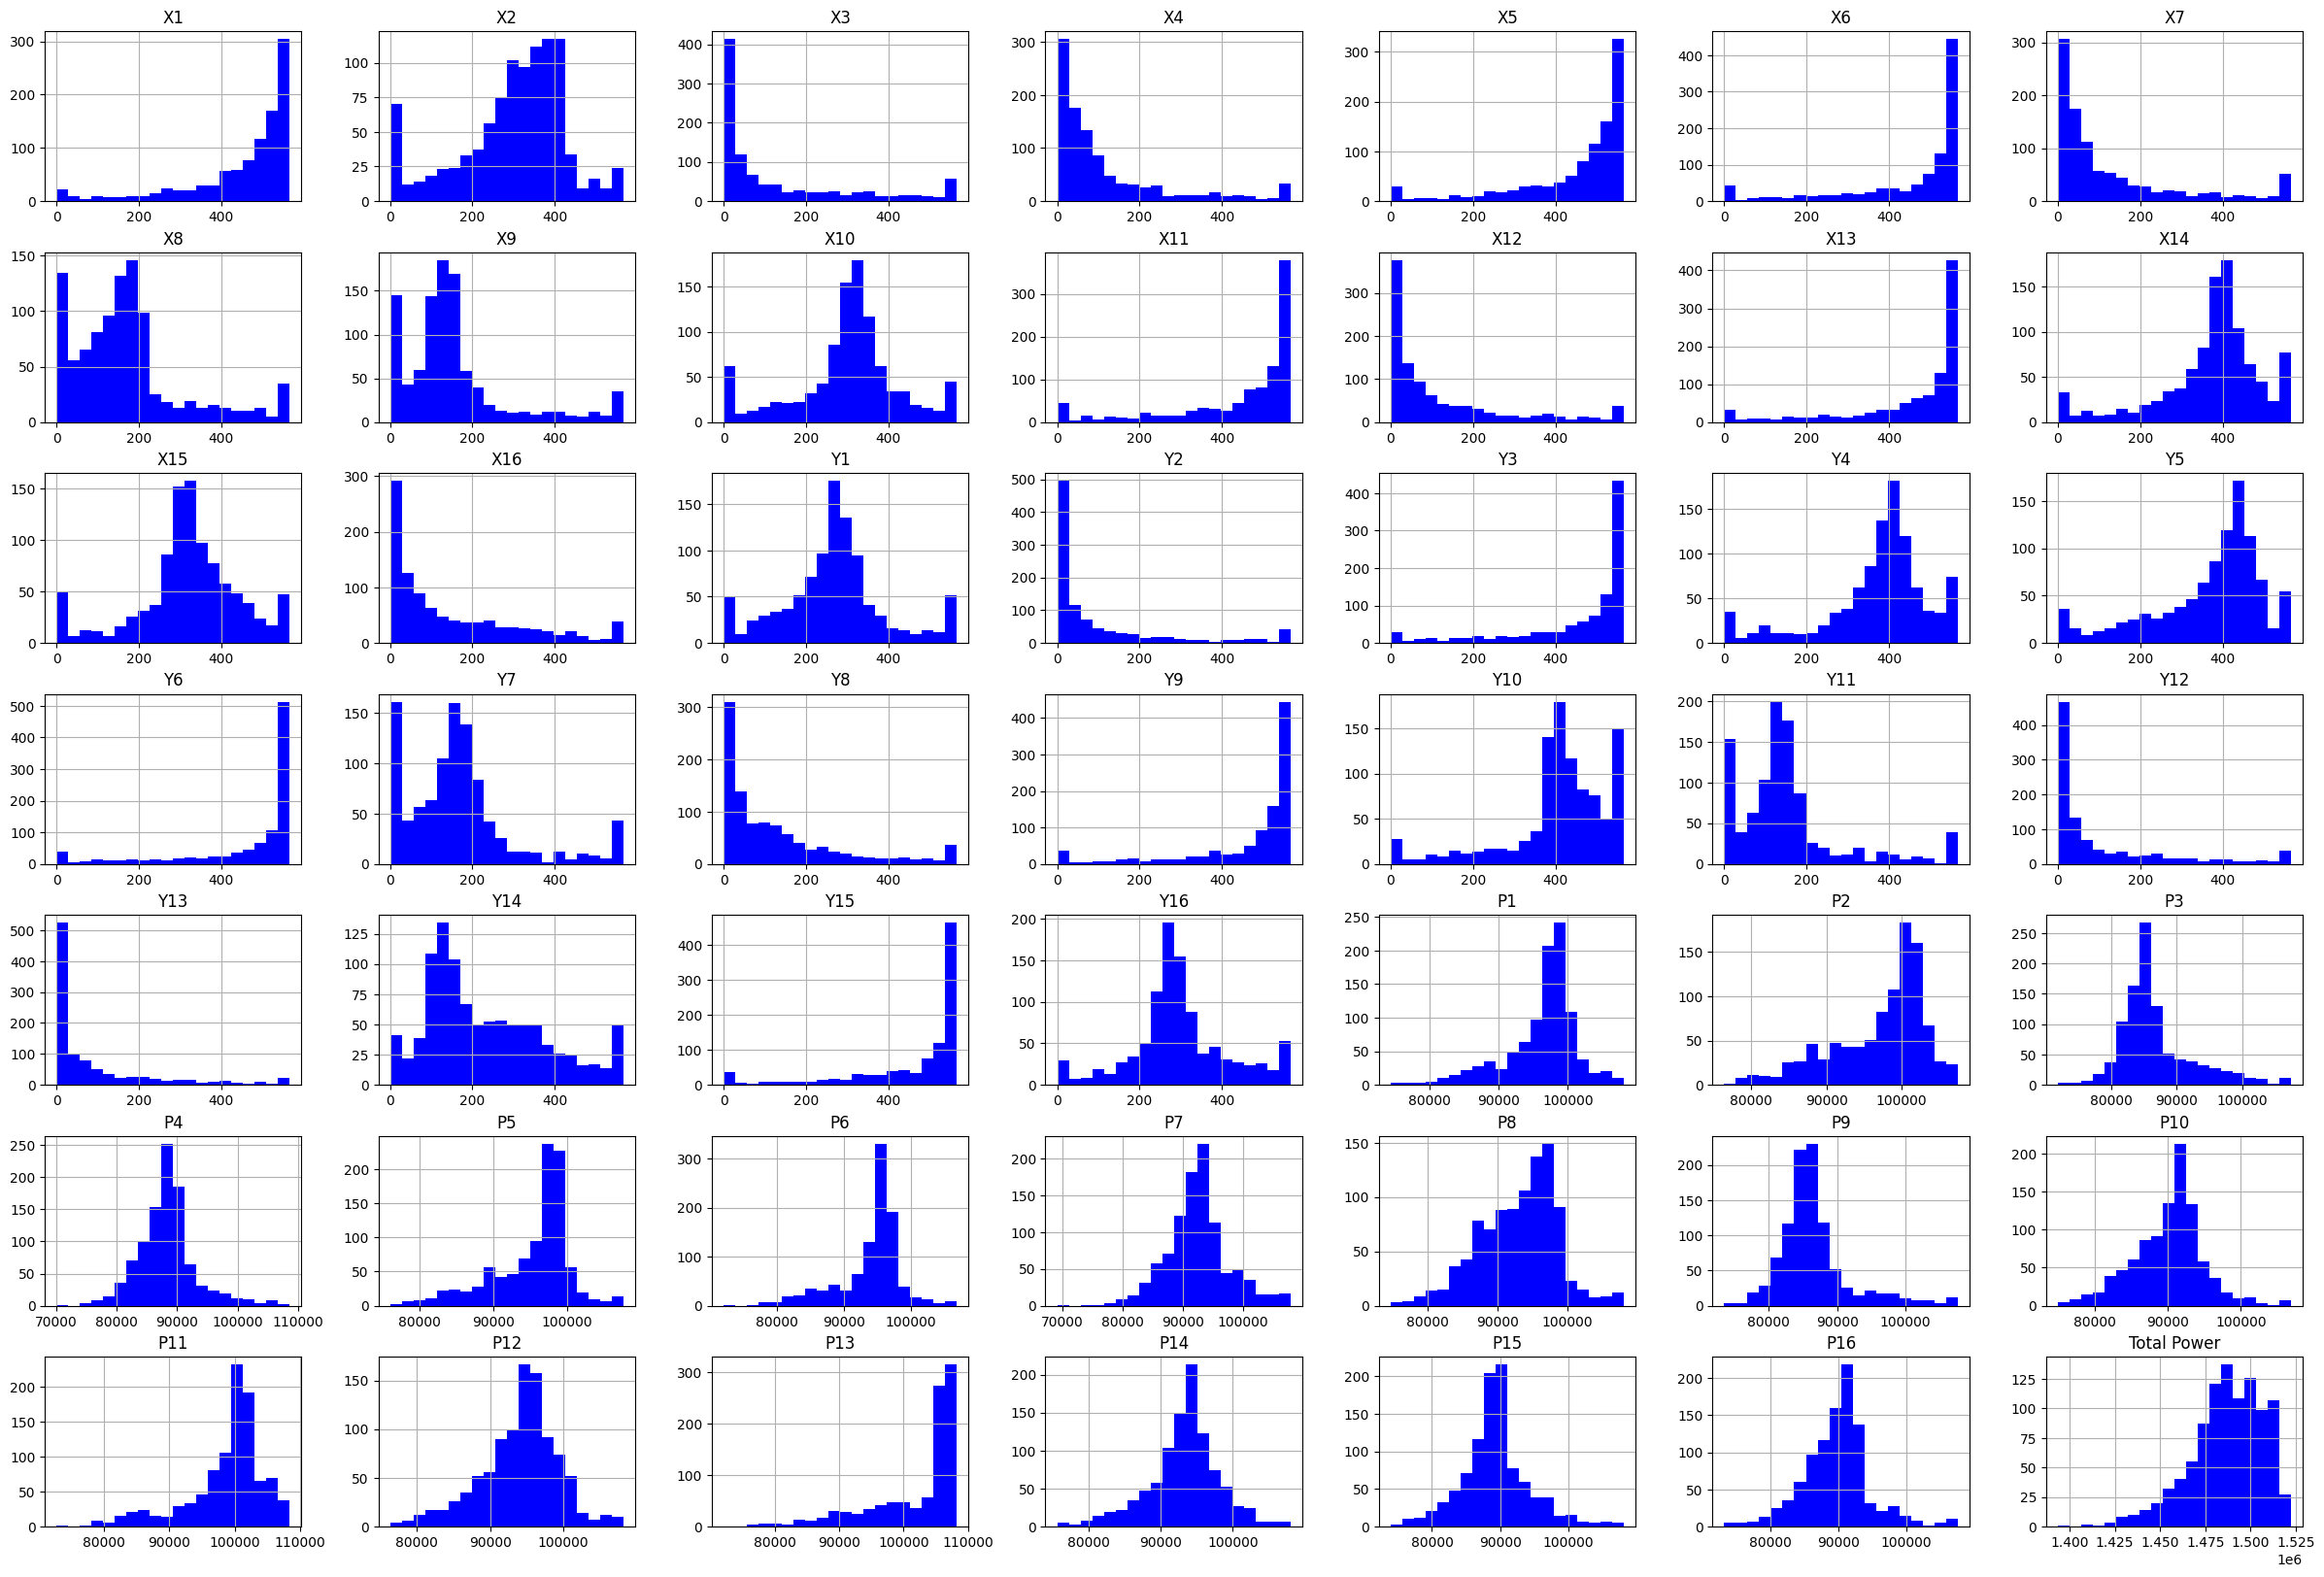

In [117]:
data.hist(bins = 20, figsize = (30,20),color='blue')
plt.show()

C:\Users\Raghav Khanna\AppData\Local\Temp\ipykernel_37444\2827361504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Total Power'],color='green')


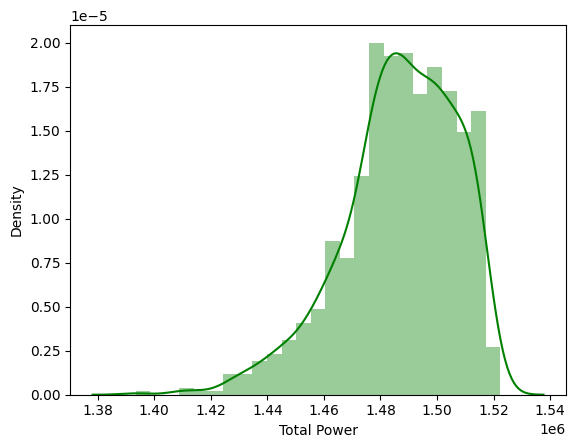

In [118]:
sns.distplot(data['Total Power'],color='green')
plt.show()

In [119]:
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(data)

# Transform the data
normalized_data = scaler.transform(data)

In [120]:
# Split the data into features (X) and target (y)
X = data.drop('Total Power', axis=1)
y = data['Total Power']

# Split the data into a training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
# Define the hyperparameter grids
linear_param_grid = {}
tree_param_grid = {'max_depth': [2, 4, 6, 8]}
forest_param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [2, 4, 6, 8]}

# Create the models
linear = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

# Create the grid search objects
linear_grid_search = GridSearchCV(linear, linear_param_grid)
tree_grid_search = GridSearchCV(tree, tree_param_grid)
forest_grid_search = GridSearchCV(forest, forest_param_grid)

# Fit the grid searches to the data
linear_grid_search.fit(X_train, y_train)
tree_grid_search.fit(X_train, y_train)
forest_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for each model
print('Linear Regression:', linear_grid_search.best_params_)
print('Decision Tree Regression:', tree_grid_search.best_params_)
print('Random Forest Regression:', forest_grid_search.best_params_)

Linear Regression: {}
Decision Tree Regression: {'max_depth': 6}
Random Forest Regression: {'max_depth': 8, 'n_estimators': 50}


In [122]:
# Create new instances of the models with the optimal hyperparameters
linear = LinearRegression()
tree = DecisionTreeRegressor(max_depth=4)
forest = RandomForestRegressor(max_depth=8, n_estimators=50)

# Train the models on the training data
linear.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=50)

In [123]:
# Make predictions on the test data using the trained models, mean squared error (MSE)
linear_y_pred = linear.predict(X_test)
tree_y_pred = tree.predict(X_test)
forest_y_pred = forest.predict(X_test)

# Evaluate the performance of the models using a suitable evaluation metric
from sklearn.metrics import mean_squared_error

linear_mse = mean_squared_error(y_test, linear_y_pred)
tree_mse = mean_squared_error(y_test, tree_y_pred)
forest_mse = mean_squared_error(y_test, forest_y_pred)

print('Linear Regression MSE:', linear_mse)
print('Decision Tree Regression MSE:', tree_mse)
print('Random Forest Regression MSE:', forest_mse)

Linear Regression MSE: 9.507444433728577e-08
Decision Tree Regression MSE: 250310533.4345828
Random Forest Regression MSE: 144955451.31227073


In [126]:
# Calculate the Mean absolute error (MAE)
linear_mae = mean_absolute_error(y_test, linear_y_pred)
tree_mae = mean_absolute_error(y_test, tree_y_pred)
forest_mae = mean_absolute_error(y_test, forest_y_pred)


# Print the results
print('Linear Regression MAE:', linear_mae)
print('Decision Tree Regression MAE:', tree_mae)
print('Random Forest Regression MAE:', forest_mae)



Linear Regression MAE: 0.0002533652784768492
Decision Tree Regression MAE: 11036.708387898174
Random Forest Regression MAE: 8265.455856756835


In [127]:
#Calculate R-squared

linear_r2 = r2_score(y_test, linear_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)

print('Linear Regression R-squared:', linear_r2)
print('Decision Tree Regression R-squared:', tree_r2)
print('Random Forest Regression R-squared:', forest_r2)

Linear Regression R-squared: 0.9999999999999998
Decision Tree Regression R-squared: 0.5186420010886051
Random Forest Regression R-squared: 0.7212443878507087


In [125]:
# Calculate Root Mean Squared Error(RMSE) for each model
linear_rmse = sqrt(mean_squared_error(y_test, linear_y_pred))
tree_rmse = sqrt(mean_squared_error(y_test, tree_y_pred))
forest_rmse = sqrt(mean_squared_error(y_test, forest_y_pred))

# Print the results
print('Linear Regression RMSE:', linear_rmse)
print('Decision Tree Regression RMSE:', tree_rmse)
print('Random Forest Regression RMSE:', forest_rmse)

Linear Regression RMSE: 0.0003083414411610703
Decision Tree Regression RMSE: 15821.205182747071
Random Forest Regression RMSE: 12039.74465311747
